<a href="https://colab.research.google.com/github/shoopy7/shoopy7/blob/main/Coursera_Project_Snowflake_for_Beginners_Make_your_First_Snowsight_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coursera Project:  Snowflake for Beginners: Make your First Snowsight Dashboard

Snowflake for Beginners: Make your First Snowsight Dashboard  (Instructor: Mohamed Touiti)



from the Coursera Project Network

https://www.coursera.org/projects/snowflake-for-beginners-make-your-first-snowsight-dashboard

Project objectives:

* Learn key fundamentals of the Snowflake Data Platform including how to source
market intelligence data from Snowflake's Marketplace.
* Create a virtual warehouse, a database and tables and you will load data into Snowflake.
* Cross-analyze datasets using snowflake SQL worksheets and you will create your first snowsight dashboard.  

Skills:
* Snowflake
* SQL
* Data management
* Data Analysis
* Cloud computing


Note:  Instructions and project files available in the project located at:
https://www.coursera.org/projects/snowflake-for-beginners-make-your-first-snowsight-dashboard




In [ ]:
# get free trial account with Snowflake as described in project instructions
# continue through project instructions to learn about the marketplace and featrues relevant for this project

In [ ]:
# create warehouse script
create WAREHOUSE IDENTIFIER('"RAREBURGER_WH"')
COMMENT = '' WAREHOUSE_SIZE = 'X-Small'
AUTO_RESUME = true AUTO_SUSPEND = 300
ENABLE_QUERY_ACCELERATION = false WAREHOUSE_TYPE = 'STANDARD'

In [ ]:
# privileges
GRANT IMPORTED PRIVILEGES ON DATABASE IDENTIFIER('"FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS"')
TO ROLE IDENTIFIER('"PUBLIC"')

In [ ]:
# once data warehouse created and data sets are stored begin creating SQL database

In [ ]:
# remember to suspend warehouse to save credits
alter WAREHOUSE IDENTIFIER('"COMPUTE_WH"') suspend

# or ('"RAREBURGER_WH"') depending on your settings / choice
alter WAREHOUSE IDENTIFIER('"RAREBURGER_WH"') suspend

In [ ]:
# be sure to be in correct user role
USE ROLE ACCOUNTADMIN;

In [ ]:
# create datebase and Monthly Revenue table

USE ROLE ACCOUNTADMIN;
CREATE DATABASE IF NOT EXISTS THERAREBURGER;
USE DATABASE THERAREBURGER;
USE SCHEMA PUBLIC;

CREATE OR REPLACE TABLE MONTHLY_REVENUE (
  "LOCATION_NAME" varchar(50),
  "REGION" varchar2(50),
  "POSTAL_CODE" varchar2(255),
  "STREET_ADDRESS" varchar2(255) ,
  "RAW_TOTAL_SPEND" FLOAT ,
  "RAW_NUM_TRANSACTIONS" number,
  "RAW_NUM_CUSTOMERS" number,
  "ONLINE_SPEND" FLOAT ,
  "MEDIAN_SPEND_PER_TRANSACTION" FLOAT ,
  "MEDIAN_SPEND_PER_CUSTOMER" FLOAT
);

In [ ]:
# explore data set
select *
from IDENTIFIER('"THERAREBURGER"."PUBLIC"."MONTHLY_REVENUE"')
limit 100


In [ ]:
select * from monthly_revenue;

In [ ]:
# explore second data set
select *
from IDENTIFIER('"FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS"."PUBLIC"."SPEND_CROSS_SHOPPING_SAMPLE"')
limit 100

In [ ]:
select *
from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE

In [ ]:
select *
from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE
where category_tags like '%burger%'

In [ ]:
# prep for joining by listing all column names (they match from project instructions / script)

In [ ]:
# prep for joining by listing all column names (they match from project instructions / script)
select LOCATION_NAME,
  REGION, POSTAL_CODE, STREET_ADDRESS, RAW_TOTAL_SPEND,
  RAW_NUM_TRANSACTIONS, RAW_NUM_CUSTOMERS, ONLINE_SPEND,
  MEDIAN_SPEND_PER_TRANSACTION, MEDIAN_SPEND_PER_CUSTOMER
from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE where category_tags
like '%Burger%';

In [ ]:
# prep for joining lisitng all the col names from the monthly revenue table (verify column names / types match completely for JOIN)
select LOCATION_NAME,
  REGION, POSTAL_CODE, STREET_ADDRESS, RAW_TOTAL_SPEND,
  RAW_NUM_TRANSACTIONS, RAW_NUM_CUSTOMERS, ONLINE_SPEND,
  MEDIAN_SPEND_PER_TRANSACTION, MEDIAN_SPEND_PER_CUSTOMER
from monthly_revenue

In [ ]:
# join second date set and continue exploration of merged sets
select LOCATION_NAME, REGION, POSTAL_CODE, STREET_ADDRESS, RAW_TOTAL_SPEND, RAW_NUM_TRANSACTIONS, RAW_NUM_CUSTOMERS, ONLINE_SPEND, MEDIAN_SPEND_PER_TRANSACTION, MEDIAN_SPEND_PER_CUSTOMER
from monthly_revenue

UNION

select LOCATION_NAME, REGION, POSTAL_CODE, STREET_ADDRESS, RAW_TOTAL_SPEND, RAW_NUM_TRANSACTIONS, RAW_NUM_CUSTOMERS, ONLINE_SPEND, MEDIAN_SPEND_PER_TRANSACTION, MEDIAN_SPEND_PER_CUSTOMER
from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE where category_tags like '%Burger%';

In [ ]:
# find total spending by location

select LOCATION_NAME, REGION, POSTAL_CODE, RAW_TOTAL_SPEND from monthly_revenue
UNION
select LOCATION_NAME, REGION, POSTAL_CODE, RAW_TOTAL_SPEND from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE where category_tags like '%Burger%';

Create dashboard "Total Spending by Location"

In [ ]:
# find number of customers by location
select LOCATION_NAME, REGION, POSTAL_CODE, RAW_NUM_CUSTOMERS from monthly_revenue
UNION
select LOCATION_NAME, REGION, POSTAL_CODE, RAW_NUM_CUSTOMERS from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE where category_tags like '%Burger%';

Create dashboard "Number of Customers by Location"

In [ ]:
# find online spending by location
select LOCATION_NAME, REGION, POSTAL_CODE, ONLINE_SPEND from monthly_revenue
UNION
select LOCATION_NAME, REGION, POSTAL_CODE, ONLINE_SPEND from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE where category_tags like '%Burger%';

Create dashboard "Online Spending by Location"

Make observations from dashboards
Develop more questions to explore

In [ ]:
# find median spending per transaction by 3 specified locations
select LOCATION_NAME, REGION, POSTAL_CODE, MEDIAN_SPEND_PER_TRANSACTION from monthly_revenue where postal_code IN ('10036','10019','10003')
UNION
select LOCATION_NAME, REGION, POSTAL_CODE, MEDIAN_SPEND_PER_TRANSACTION from FREE_SAMPLE_CROSS_SHOPPING_INSIGHTS__NYC_RESTAURANTS.PUBLIC.SPEND_CROSS_SHOPPING_SAMPLE where category_tags like '%Burger%' AND postal_code IN ('10036','10019','10003')

Create dashboard HeatMap "Median Spending per Transaction by 3 Locations of Interest"

In [3]:
import os
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
img = plt.imread('/content/drive/MyDrive/Colab Notebooks/Coursera/Google projects/snowflake for beginners end to end first snowsight dashboard/to share 4 dashboards created in snowflake project 20250216 (1).png')

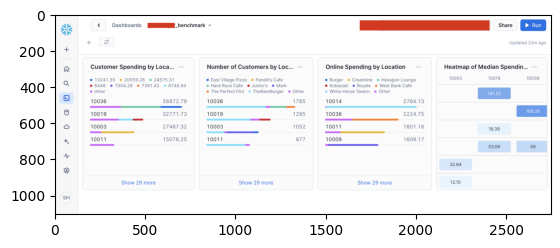

In [7]:
plt.imshow(img)